In [8]:
from simulator import Simulation, SimulationConfig
from tp5.traj_ref import TrajRef 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tp5.scenes import (buildSceneCubes, buildSceneRobotHand, buildSceneHouseOfCards, 
                        buildSceneQuadrupedOnHills, buildSceneHandAndStackedCubes, 
                        buildSceneTalosFallingCube,  buildSceneTriangleAndBall)

In [64]:
# Set matplotlib default parameters
plt.rcParams.update({
    'font.size': 11,
    'figure.figsize': (4, 3),
    'font.family': 'serif',
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
})

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#d7a0e7"])


## Cubes

In [49]:
# --- MODEL ---
model, geom_model = buildSceneCubes(3)
data = model.createData()
geom_data = geom_model.createData()

for req in geom_data.collisionRequests:
    req.security_margin = 1e-4
    req.num_max_contacts = 5
    req.enable_contact = True


# --- SIMULATION PARAMETERS ---
DT = 1e-4
DT_VISU = 1/50.
DURATION = 2
MU = 0.8
MAX_STAGGERED_ITERS = 20
STAGGERED_TOL = 1e-6
ENABLE_CONTACT = True
ENABLE_FRICTION = True

RECORD_VIDEO = False
FILE_NAME = "cubes.mp4"

# Configure the simulation
config = SimulationConfig(model, dt=DT, dt_visu=DT_VISU, duration=DURATION, 
                            mu=MU, max_staggered_iters=MAX_STAGGERED_ITERS, staggered_tol=STAGGERED_TOL,
                            enable_contact=ENABLE_CONTACT, enable_friction=ENABLE_FRICTION,
                            record_video=RECORD_VIDEO, video_filename=FILE_NAME) 
                            
simulation = Simulation(config, model, data, geom_model, geom_data)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7015/static/


In [50]:
# simulation.viz.viewer.jupyter_cell()

In [51]:
hist, num = simulation.run()

Number of iterations when did not converge: 0


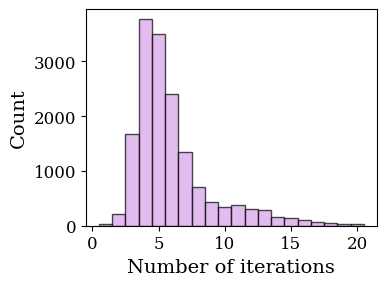

In [65]:
fig, ax = plt.subplots()

ax.hist(
    hist,
    bins=np.arange(1, max(hist) + 2) - 0.5,
    edgecolor='black',
    alpha=0.7)

ax.set_xlabel('Number of iterations')
ax.set_ylabel('Count')
fig.tight_layout()
fig.savefig('figures/cubes.pdf')

print(f"Number of iterations when did not converge: {num}")

## House of cards

In [ ]:
# --- MODEL ---
model, geom_model = buildSceneHouseOfCards()
data = model.createData()
geom_data = geom_model.createData()

for req in geom_data.collisionRequests:
    req.security_margin = 1e-2
    req.num_max_contacts = 10
    req.enable_contact = True


# --- SIMULATION PARAMETERS ---
DT = 1e-4
DT_VISU = 1/50.
DURATION = 2
MU = 0.8
MAX_STAGGERED_ITERS = 20
STAGGERED_TOL = 1e-6
ENABLE_CONTACT = True
ENABLE_FRICTION = True

RECORD_VIDEO = False
FILE_NAME = "house_of_cards.mp4"

# Configure the simulation
config = SimulationConfig(model, dt=DT, dt_visu=DT_VISU, duration=DURATION, 
                            mu=MU, max_staggered_iters=MAX_STAGGERED_ITERS, staggered_tol=STAGGERED_TOL,
                            enable_contact=ENABLE_CONTACT, enable_friction=ENABLE_FRICTION,
                            record_video=RECORD_VIDEO, video_filename=FILE_NAME) 
                            
simulation = Simulation(config, model, data, geom_model, geom_data)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7027/static/


In [ ]:
simulation.viz.viewer.jupyter_cell()

In [ ]:
simulation.run()

KeyboardInterrupt: 

## Robotic hand

In [ ]:
# --- MODEL ---
model, geom_model = buildSceneRobotHand()
data = model.createData()
geom_data = geom_model.createData()

for req in geom_data.collisionRequests:
    req.security_margin = 1e-2
    req.num_max_contacts = 10
    req.enable_contact = True


# --- SIMULATION PARAMETERS ---
DT = 1e-4
DT_VISU = 1/50.
DURATION = 2
MU = 0.8
MAX_STAGGERED_ITERS = 20
STAGGERED_TOL = 1e-6
ENABLE_CONTACT = True
ENABLE_FRICTION = True

RECORD_VIDEO = False
FILE_NAME = "house_of_cards.mp4"

# Trajectory Reference
q0 = model.referenceConfigurations['default']
qdes = TrajRef(
    q0,
    omega=np.array([0, 0.1, 1, 1.5, 2.5, -1, -1.5, -2.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
    amplitude=1.5,
)

# Configure the simulation
config = SimulationConfig(model, dt=DT, dt_visu=DT_VISU, duration=DURATION, 
                            mu=MU, max_staggered_iters=MAX_STAGGERED_ITERS, staggered_tol=STAGGERED_TOL,
                            enable_contact=ENABLE_CONTACT, enable_friction=ENABLE_FRICTION,
                            record_video=RECORD_VIDEO, video_filename=FILE_NAME) 
                            
simulation = Simulation(config, model, data, geom_model, geom_data, qdes=qdes)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7029/static/


In [ ]:
simulation.viz.viewer.jupyter_cell()

In [ ]:
simulation.run()

KeyboardInterrupt: 

## Robotic hand and cubes

In [ ]:
#--- MODEL ---
model, geom_model, visual_model = buildSceneHandAndStackedCubes()
data = model.createData()
geom_data = geom_model.createData()

for req in geom_data.collisionRequests:
    req.security_margin = 1e-2
    req.num_max_contacts = 10
    req.enable_contact = True


# --- SIMULATION PARAMETERS ---
DT = 1e-4
DT_VISU = 1/50.
DURATION = 2
MU = 0.8
MAX_STAGGERED_ITERS = 20
STAGGERED_TOL = 1e-6
ENABLE_CONTACT = True
ENABLE_FRICTION = True

RECORD_VIDEO = False
FILE_NAME = "house_of_cards.mp4"

# Configure the simulation
config = SimulationConfig(model, dt=DT, dt_visu=DT_VISU, duration=DURATION, 
                            mu=MU, max_staggered_iters=MAX_STAGGERED_ITERS, staggered_tol=STAGGERED_TOL,
                            enable_contact=ENABLE_CONTACT, enable_friction=ENABLE_FRICTION,
                            record_video=RECORD_VIDEO, video_filename=FILE_NAME) 
                            
simulation = Simulation(config, model, data, geom_model, geom_data)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7027/static/


In [ ]:
simulation.viz.viewer.jupyter_cell()

In [ ]:
simulation.run()

KeyboardInterrupt: 

## Quadruped

In [ ]:
# --- MODEL ---
model, geom_model = buildSceneQuadrupedOnHills()
data = model.createData()
geom_data = geom_model.createData()

for req in geom_data.collisionRequests:
    req.security_margin = 1e-2
    req.num_max_contacts = 10
    req.enable_contact = True


# --- SIMULATION PARAMETERS ---
DT = 1e-4
DT_VISU = 1/50.
DURATION = 2
MU = 0.8
MAX_STAGGERED_ITERS = 20
STAGGERED_TOL = 1e-6
ENABLE_CONTACT = True
ENABLE_FRICTION = False

RECORD_VIDEO = False
FILE_NAME = "quadruped.mp4"

# Configure the simulation
config = SimulationConfig(model, dt=DT, dt_visu=DT_VISU, duration=DURATION, 
                            mu=MU, max_staggered_iters=MAX_STAGGERED_ITERS, staggered_tol=STAGGERED_TOL,
                            enable_contact=ENABLE_CONTACT, enable_friction=ENABLE_FRICTION,
                            record_video=RECORD_VIDEO, video_filename=FILE_NAME) 
                            
simulation = Simulation(config, model, data, geom_model, geom_data)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7027/static/


In [ ]:
simulation.viz.viewer.jupyter_cell()

In [ ]:
simulation.run()

KeyboardInterrupt: 

## Pyramid and ball

In [ ]:
# --- MODEL ---
model, geom_model = buildSceneTriangleAndBall() 
data = model.createData()
geom_data = geom_model.createData()

for req in geom_data.collisionRequests:
    req.security_margin = 1e-2
    req.num_max_contacts = 10
    req.enable_contact = True

# --- SIMULATION PARAMETERS ---
DT = 1e-4
DT_VISU = 1/50.
DURATION = 5
MU = 0.8
MAX_STAGGERED_ITERS = 20
STAGGERED_TOL = 1e-6
ENABLE_CONTACT = True
ENABLE_FRICTION = False

RECORD_VIDEO = False
FILE_NAME = "pyramid_and_ball.mp4"

# Initial velocity for the ball
v0 = np.zeros(model.nv)
ball_velocity_start_index = model.nv - 6
v0[ball_velocity_start_index : ball_velocity_start_index + 3] = [0.0, -2.5, 0.0]

# Configure the simulation
config = SimulationConfig(model, dt=DT, dt_visu=DT_VISU, duration=DURATION, 
                            mu=MU, max_staggered_iters=MAX_STAGGERED_ITERS, staggered_tol=STAGGERED_TOL,
                            enable_contact=ENABLE_CONTACT, enable_friction=ENABLE_FRICTION,
                            record_video=RECORD_VIDEO, video_filename=FILE_NAME, initial_v=v0) 
                            
simulation = Simulation(config, model, data, geom_model, geom_data)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7027/static/


In [ ]:

simulation.run()

KeyboardInterrupt: 